<a href="https://colab.research.google.com/github/tonyzzr/jwave/blob/main/users/jwave_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install git+https://github.com/ucl-bug/jwave.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ucl-bug/jwave.git to /tmp/pip-req-build-2av6mpyx
  Running command git clone -q https://github.com/ucl-bug/jwave.git /tmp/pip-req-build-2av6mpyx
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Cloning https://github.com/ucl-bug/jaxdf.git to /tmp/pip-install-_x773rlt/jaxdf_059989c6670342e49a08153cacd59627
  Running command git clone -q https://github.com/ucl-bug/jaxdf.git /tmp/pip-install-_x773rlt/jaxdf_059989c6670342e49a08153cacd59627
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 47 kB 2.7 MB/s 
  Created wheel for jwave: filename=jwave-0.0.3-py3-none-any.whl size=28998 sha256=a73643d35112b5deb7036acbaf62b9c4959497dfd539b9661bf1406af5d4f020
  Stored in directory: 

In [3]:
# import jax.tools.colab_tpu
# jax.tools.colab_tpu.setup_tpu()

In [4]:
from jax import jit
from jax import numpy as jnp

from jwave import FourierSeries
from jwave.acoustics.time_varying import simulate_wave_propagation
from jwave.geometry import Domain, Medium, TimeAxis
from jwave.utils import load_image_to_numpy

# Simulation parameters
N, dx = (256, 256), (0.1e-3, 0.1e-3)
domain = Domain(N, dx)
medium = Medium(domain=domain, sound_speed=1500.)
time_axis = TimeAxis.from_medium(medium, cfl=0.3, t_end=.8e-05)

# Initial pressure field
p0 = jnp.zeros(N)
for x in range(128-32, 128+32):
  p0 = p0.at[8, x].set(1.0)
p0 = FourierSeries(p0, domain)

# Compile and run the simulation
@jit
def solver(medium, p0):
  return simulate_wave_propagation(medium, time_axis, p0=p0)

pressure = solver(medium, p0)

FourierSeries[dims=1, size=(256, 256)]


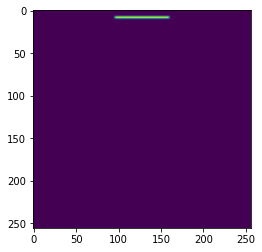

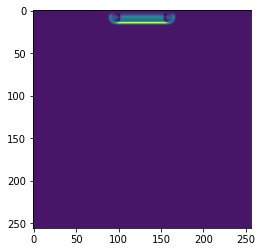

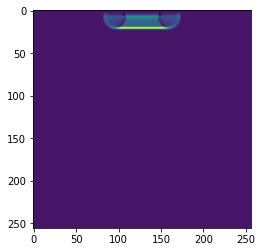

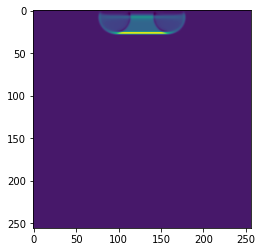

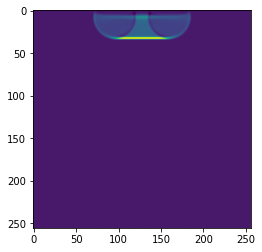

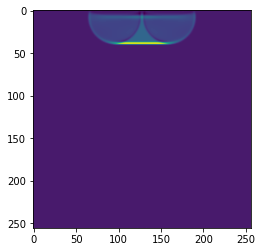

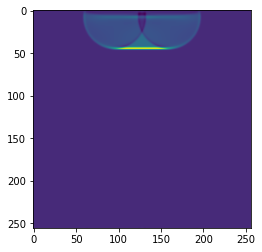

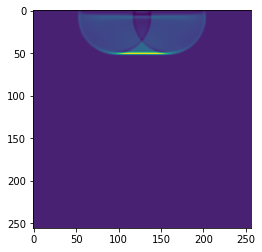

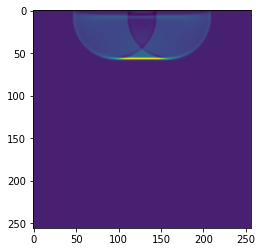

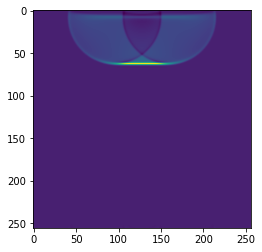

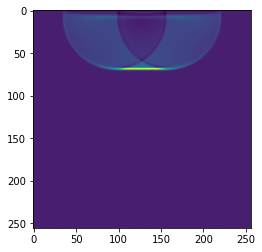

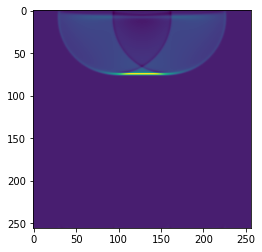

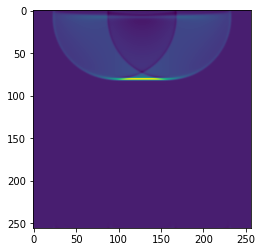

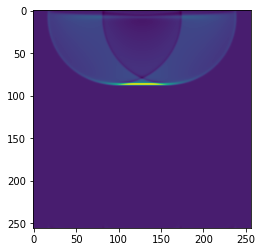

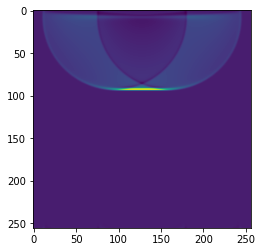

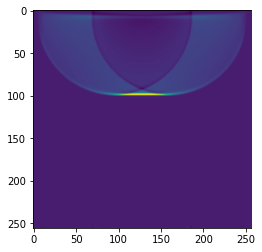

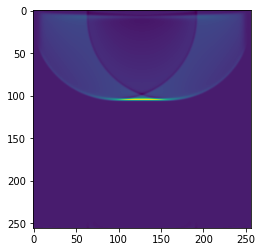

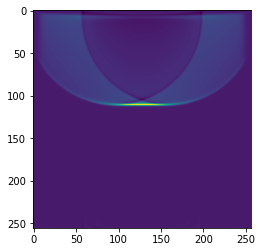

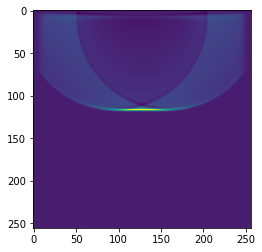

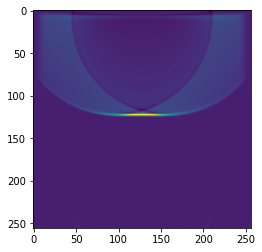

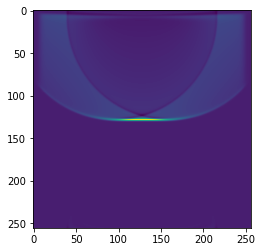

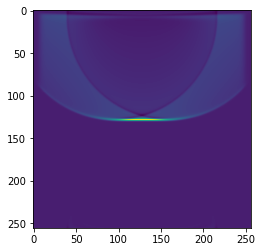

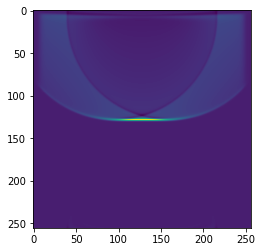

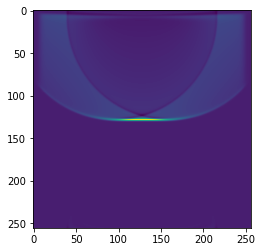

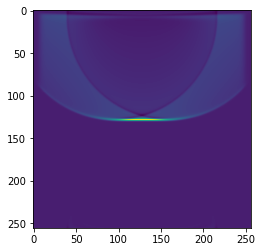

In [5]:
from matplotlib import pyplot as plt

print(pressure)
for i in range(0, 500, 20):
  plt.imshow(pressure[i].on_grid[..., 0])
  plt.show()

In [6]:
# %timeit solver(medium, p0)[-1].on_grid.block_until_ready()

2.81 s ± 1.11 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


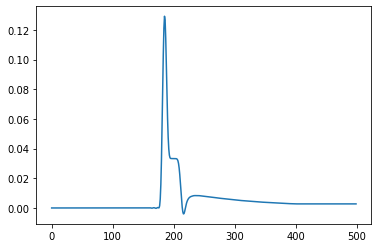

In [8]:
sig =[]
for t in range(0, 500, 1):
  sig.append(pressure[t].on_grid[64, 128, 0])

plt.plot(sig)
plt.show()